In [1]:
%cd ../..

/home/napulen/AugmentedNet


In [18]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5)

from AugmentedNet.annotation_parser import parseAnnotation
from AugmentedNet.output_representations import Bass35, Tenor35, Alto35, Soprano35
from AugmentedNet.feature_representation import SPELLINGS

In [19]:
def _plot_array(arr, filename="tmp.png"):
    plt.pcolor(arr.T, edgecolors="k", linewidth=1, cmap="Paired", vmin=0, vmax=11)
    # The vmin and vmax are necessary because cmap normalizes the values to [0, 1] before applying colors, in Paired cmaps like "Paired" or "tab20"
    # in order for two colors to be chosen next to each other, the algorithm needs to normalize using all the color options available
    # in short, vmin=0 and vmax should be set to the maximum number of colors supported by the cmap; 19 for "tab20", and "11" for "Paired"
    labels = ["{:<3}".format(x.replace("-", "b").replace("##", "x")) for x in SPELLINGS]
    step = 4
    plt.yticks(ticks=[x + 0.5 for x in range(arr.shape[1])], labels=labels, fontfamily="monospace", fontweight="bold")
    plt.xticks([x + 0.5 for x in range(0, arr.shape[0], step)], labels=range(0, arr.shape[0], step), fontsize="large", fontweight="bold")
    plt.xlabel(f"Timestep (thirty-second notes)", fontsize="xx-large", fontweight="bold")
    plt.ylabel(f"Pitch spelling", fontsize="xx-large", fontweight="bold")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [20]:
score = "claraschumann.rntxt"
df = parseAnnotation(score)
df = df.iloc[:100]

In [24]:
def one_hot(array):
    arr = array.reshape(-1)
    n_values = 35
    # n_values = np.max(arr) + 1
    return np.eye(n_values)[array.reshape(-1)]

In [25]:
bass35 = Bass35(df)
tenor35 = Tenor35(df)
alto35 = Alto35(df)
soprano35 = Soprano35(df)

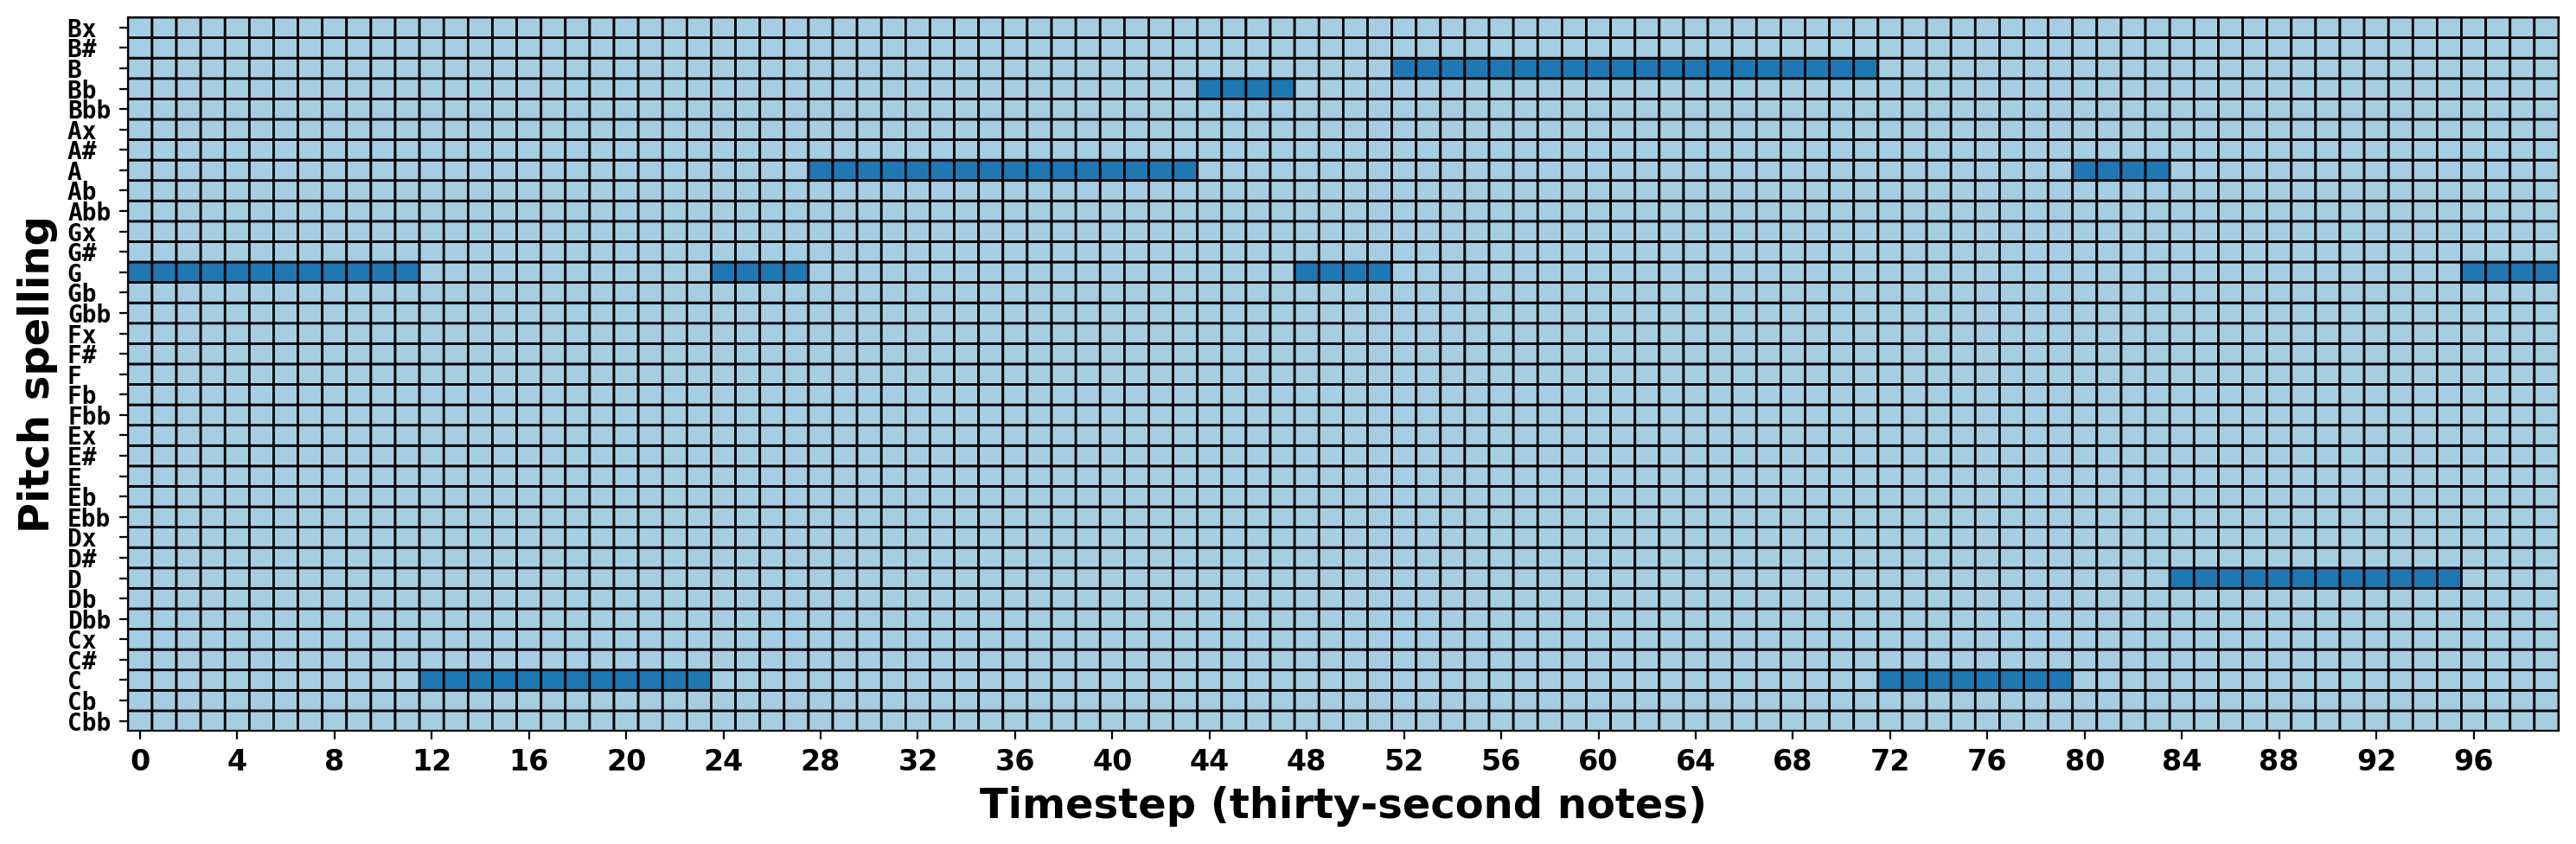

In [26]:
_plot_array(one_hot(bass35.array), "bass35.png")

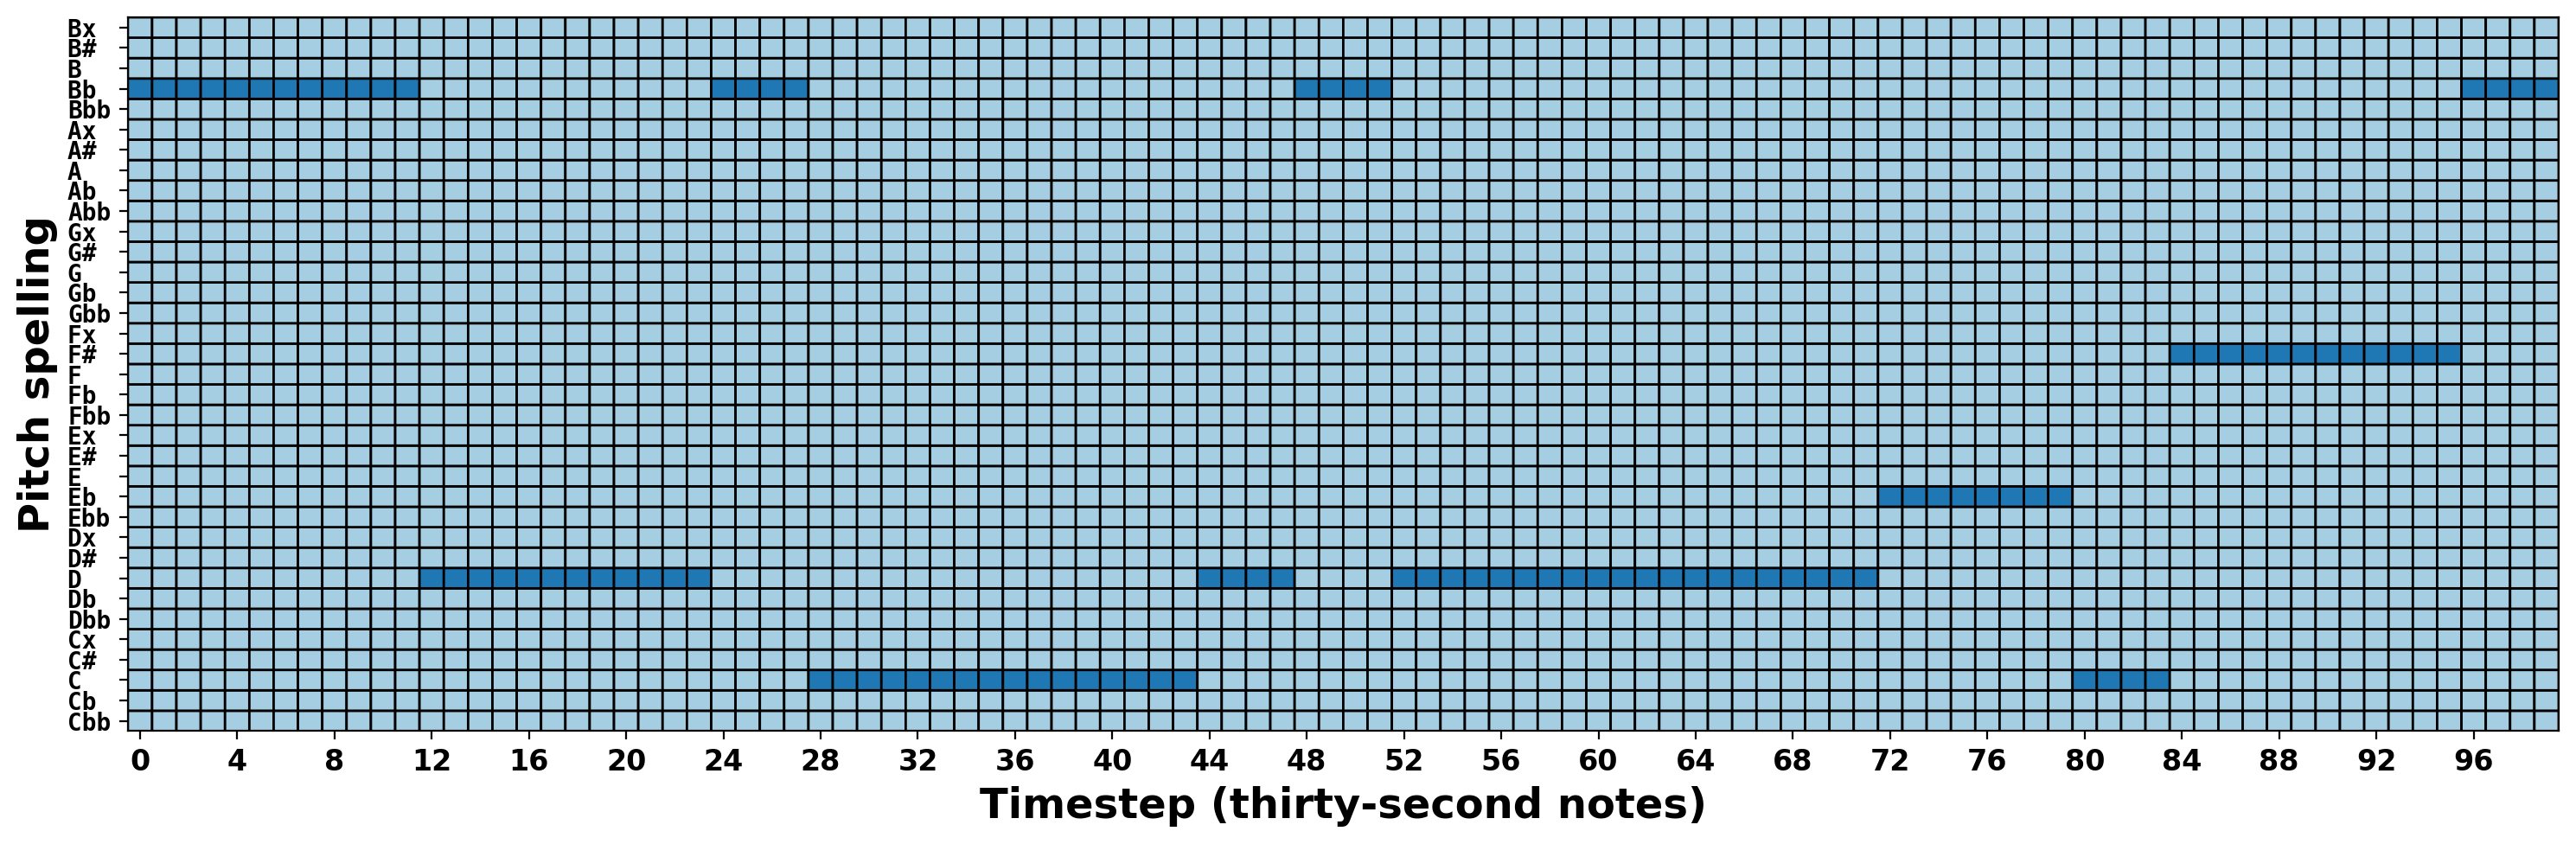

In [27]:
_plot_array(one_hot(tenor35.array), "tenor35.png")

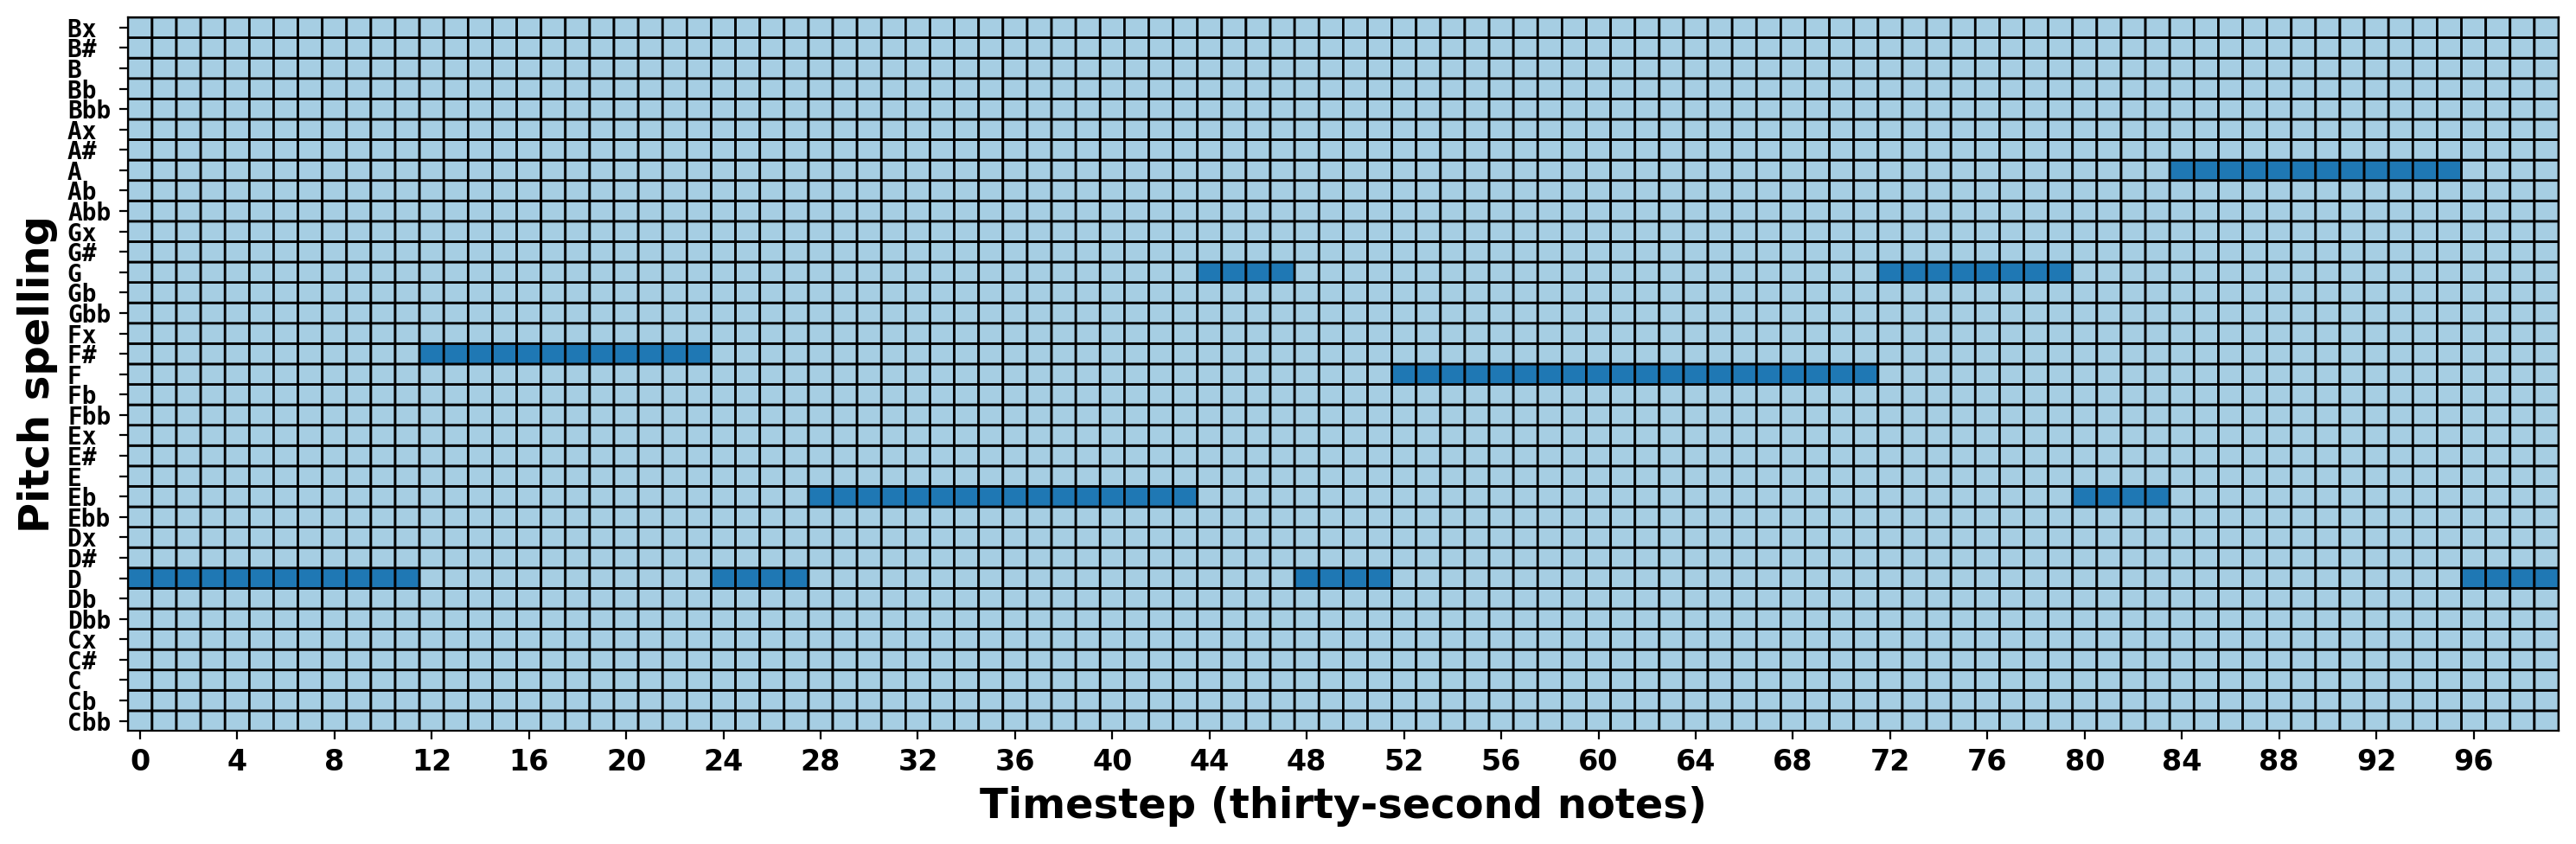

In [28]:
_plot_array(one_hot(alto35.array), "alto35.png")

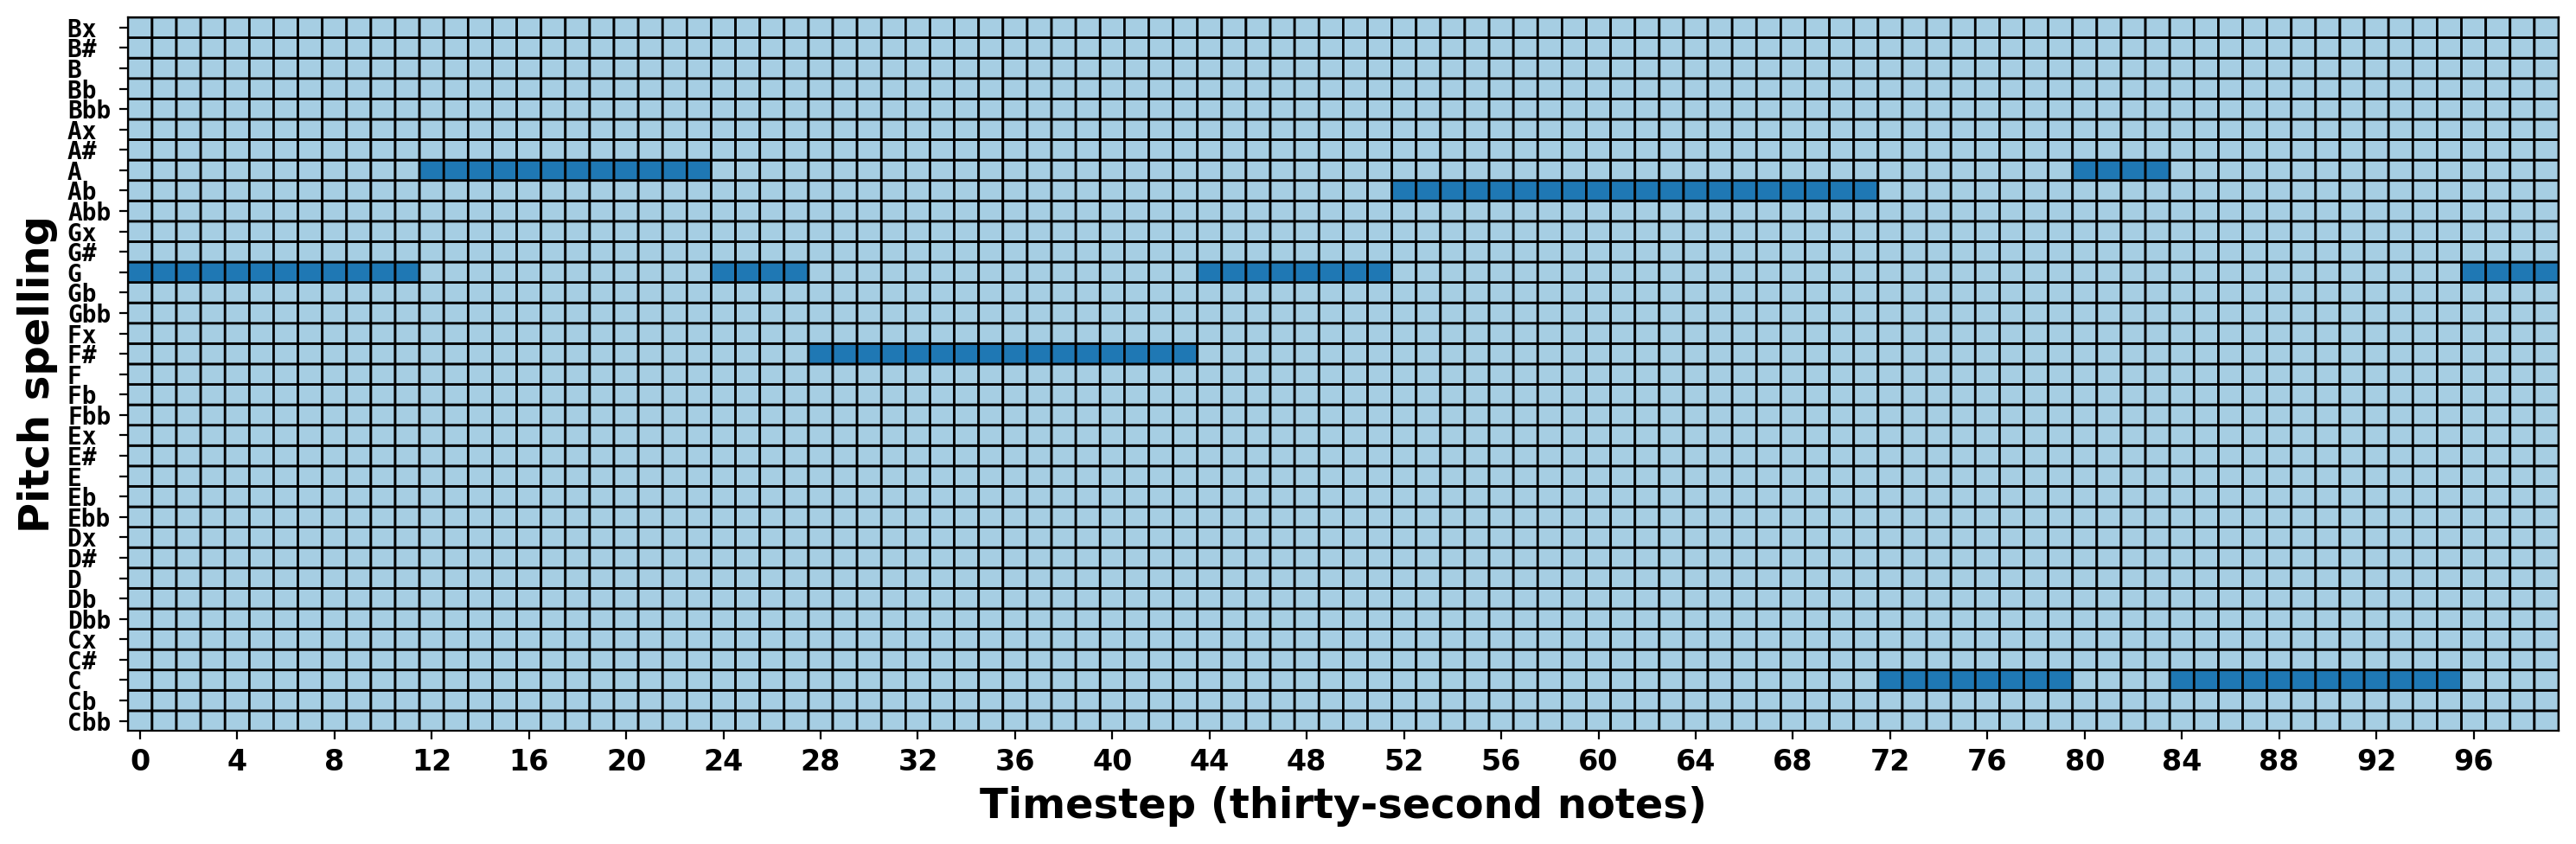

In [29]:
_plot_array(one_hot(soprano35.array), "soprano35.png")